In [14]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/201.2 GB disk)


In [1]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
#439
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rUYy1neZ9iPnj6hyBsim")
project = rf.workspace("project-ynhfw").project("graffiti-detection-ibxz4")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing i

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Graffiti-detection-2 in yolov8:: 100%|██████████| 2118/2118 [00:00<00:00, 5843.37it/s]


In [2]:
%cd /content

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Graffiti-detection-2/data.yaml epochs=100 lr0= 0.00105  lrf= 0.00554  momentum= 0.80569 weight_decay= 0.00027 warmup_epochs= 2.47912  warmup_momentum= 0.72036  box= 3.47315  cls= 0.29911  dfl= 3.32579  hsv_h= 0.01291  hsv_s= 0.88608  hsv_v= 0.25115  translate= 0.10608  scale= 0.78376  fliplr= 0.35045 mosaic= 0.64963  batch=16,  plots=True

/content
WARNING ⚠️ 'batch=16,' does not require trailing comma ',', updating to 'batch=16'.
100% 21.5M/21.5M [00:00<00:00, 217MB/s]
New https://pypi.org/project/ultralytics/8.1.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Graffiti-detection-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False,

/content


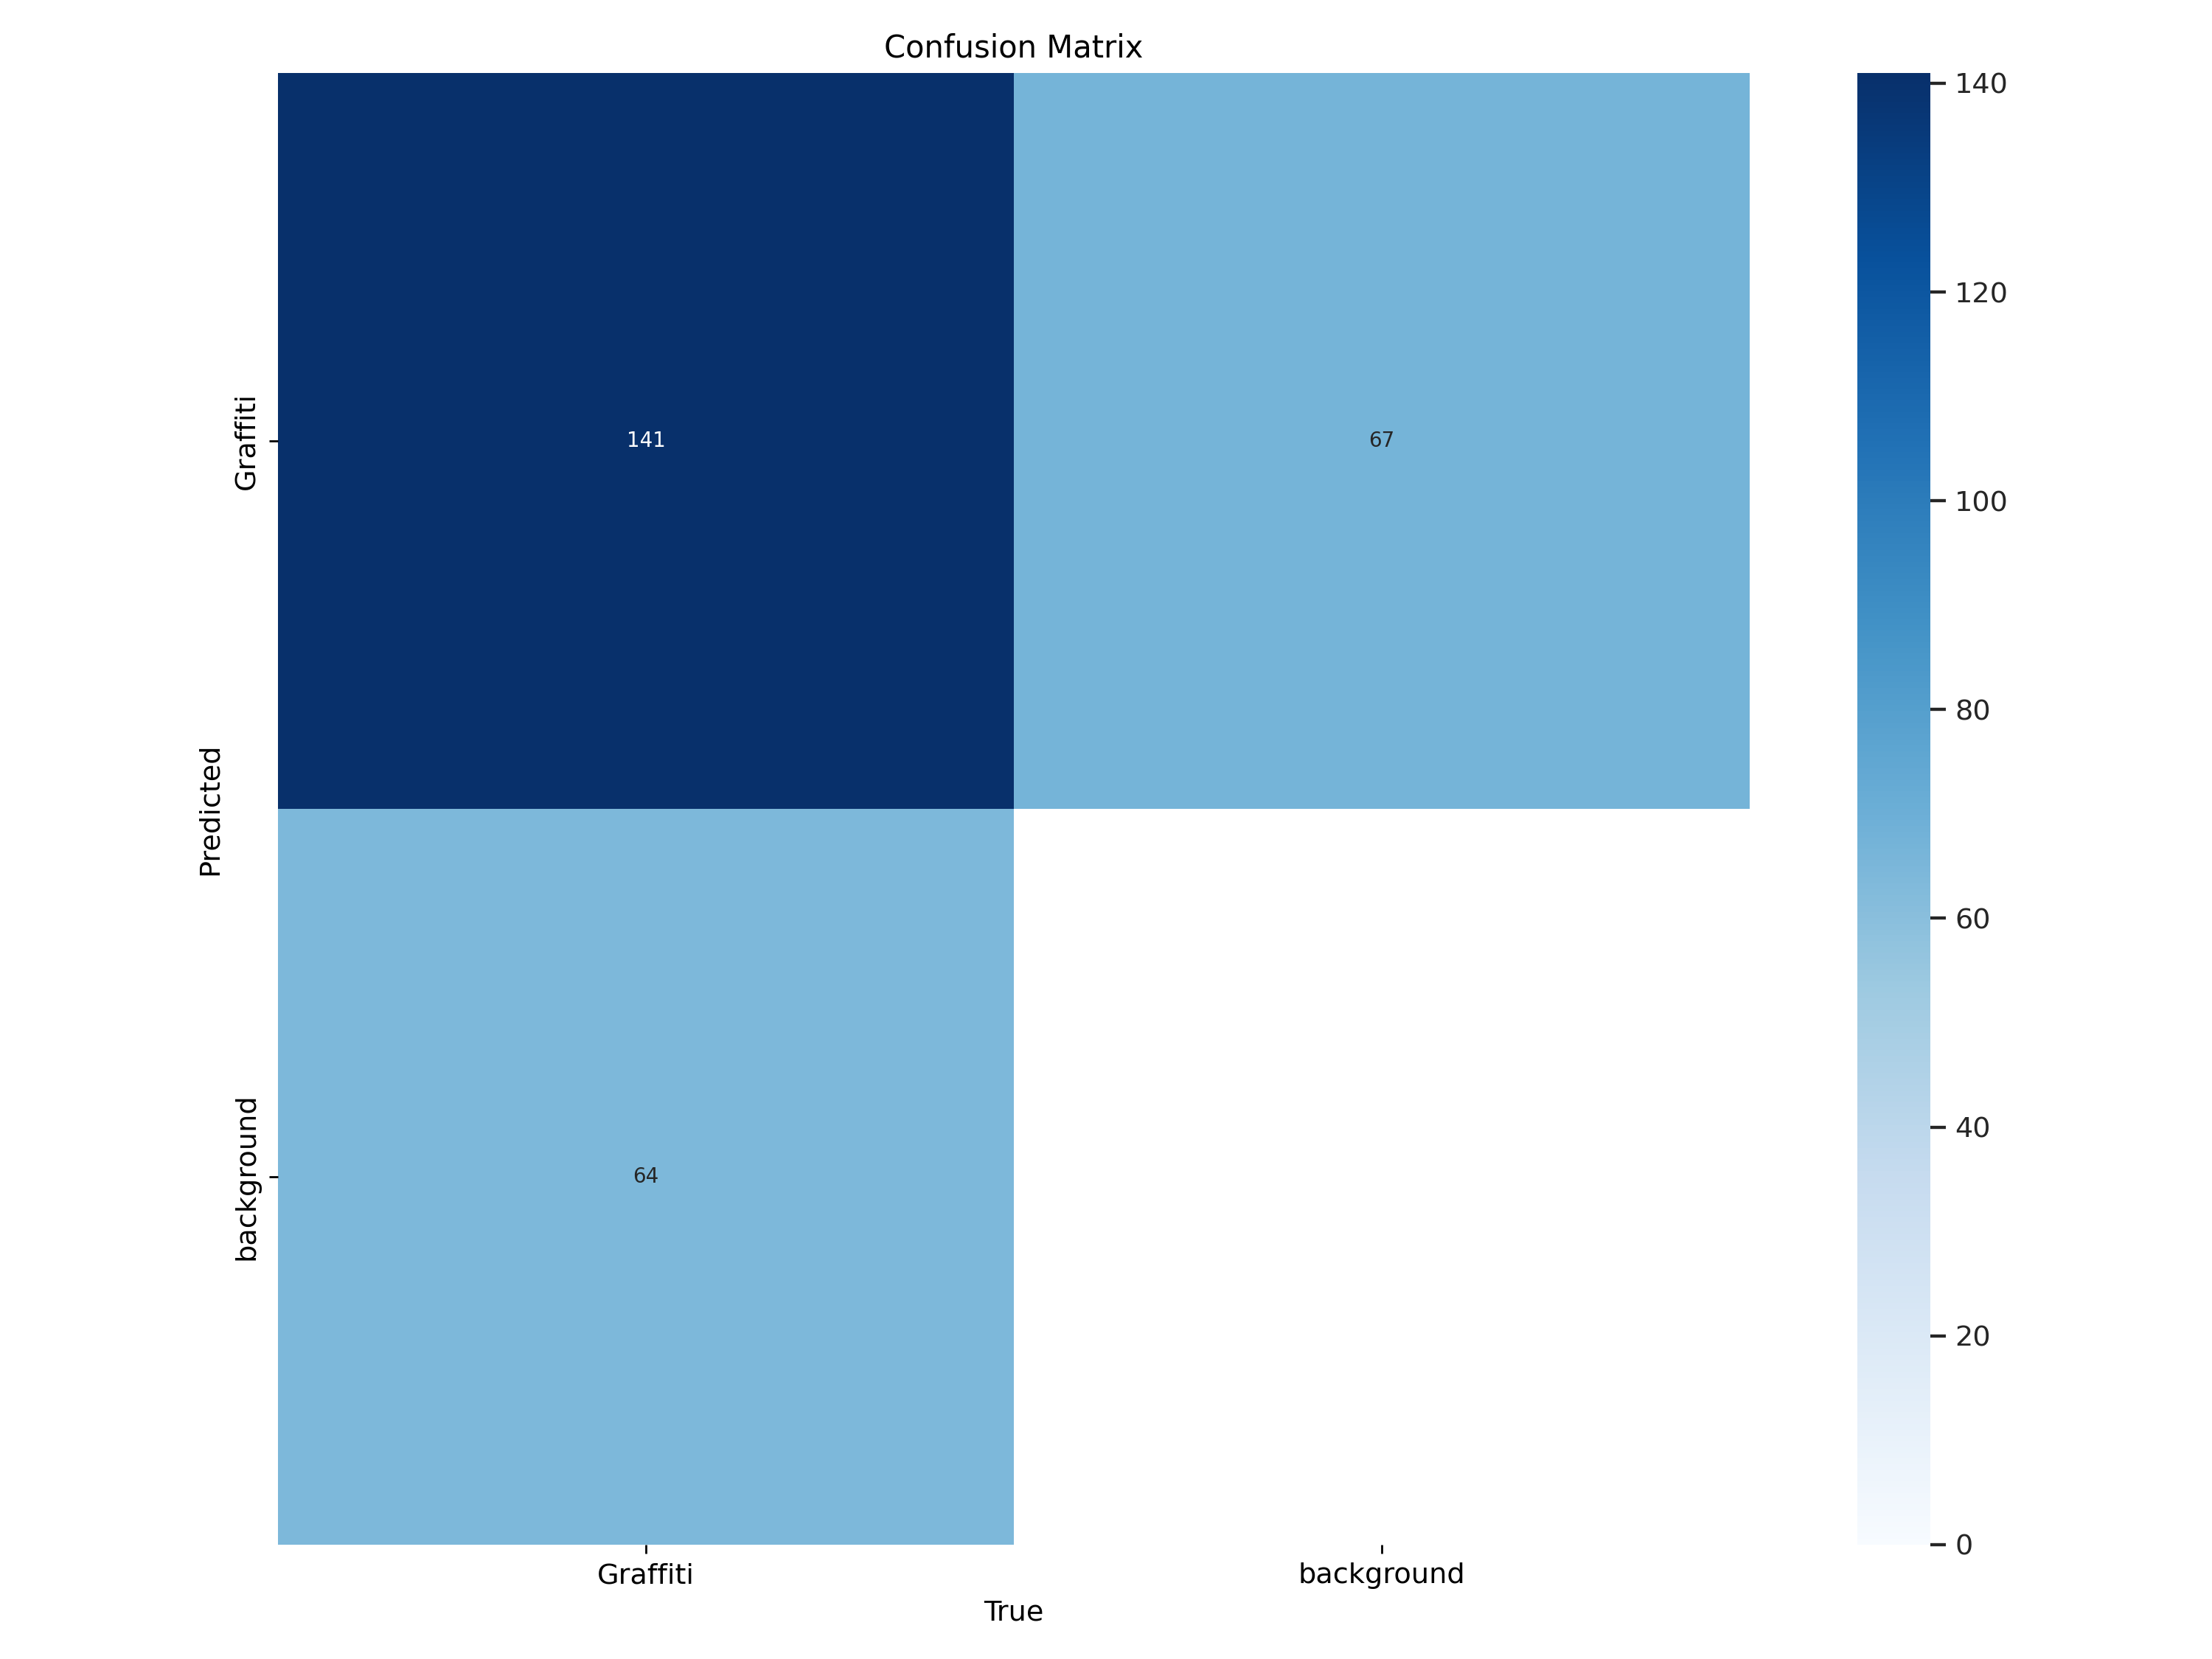

In [5]:
%cd /content
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=2000)

/content


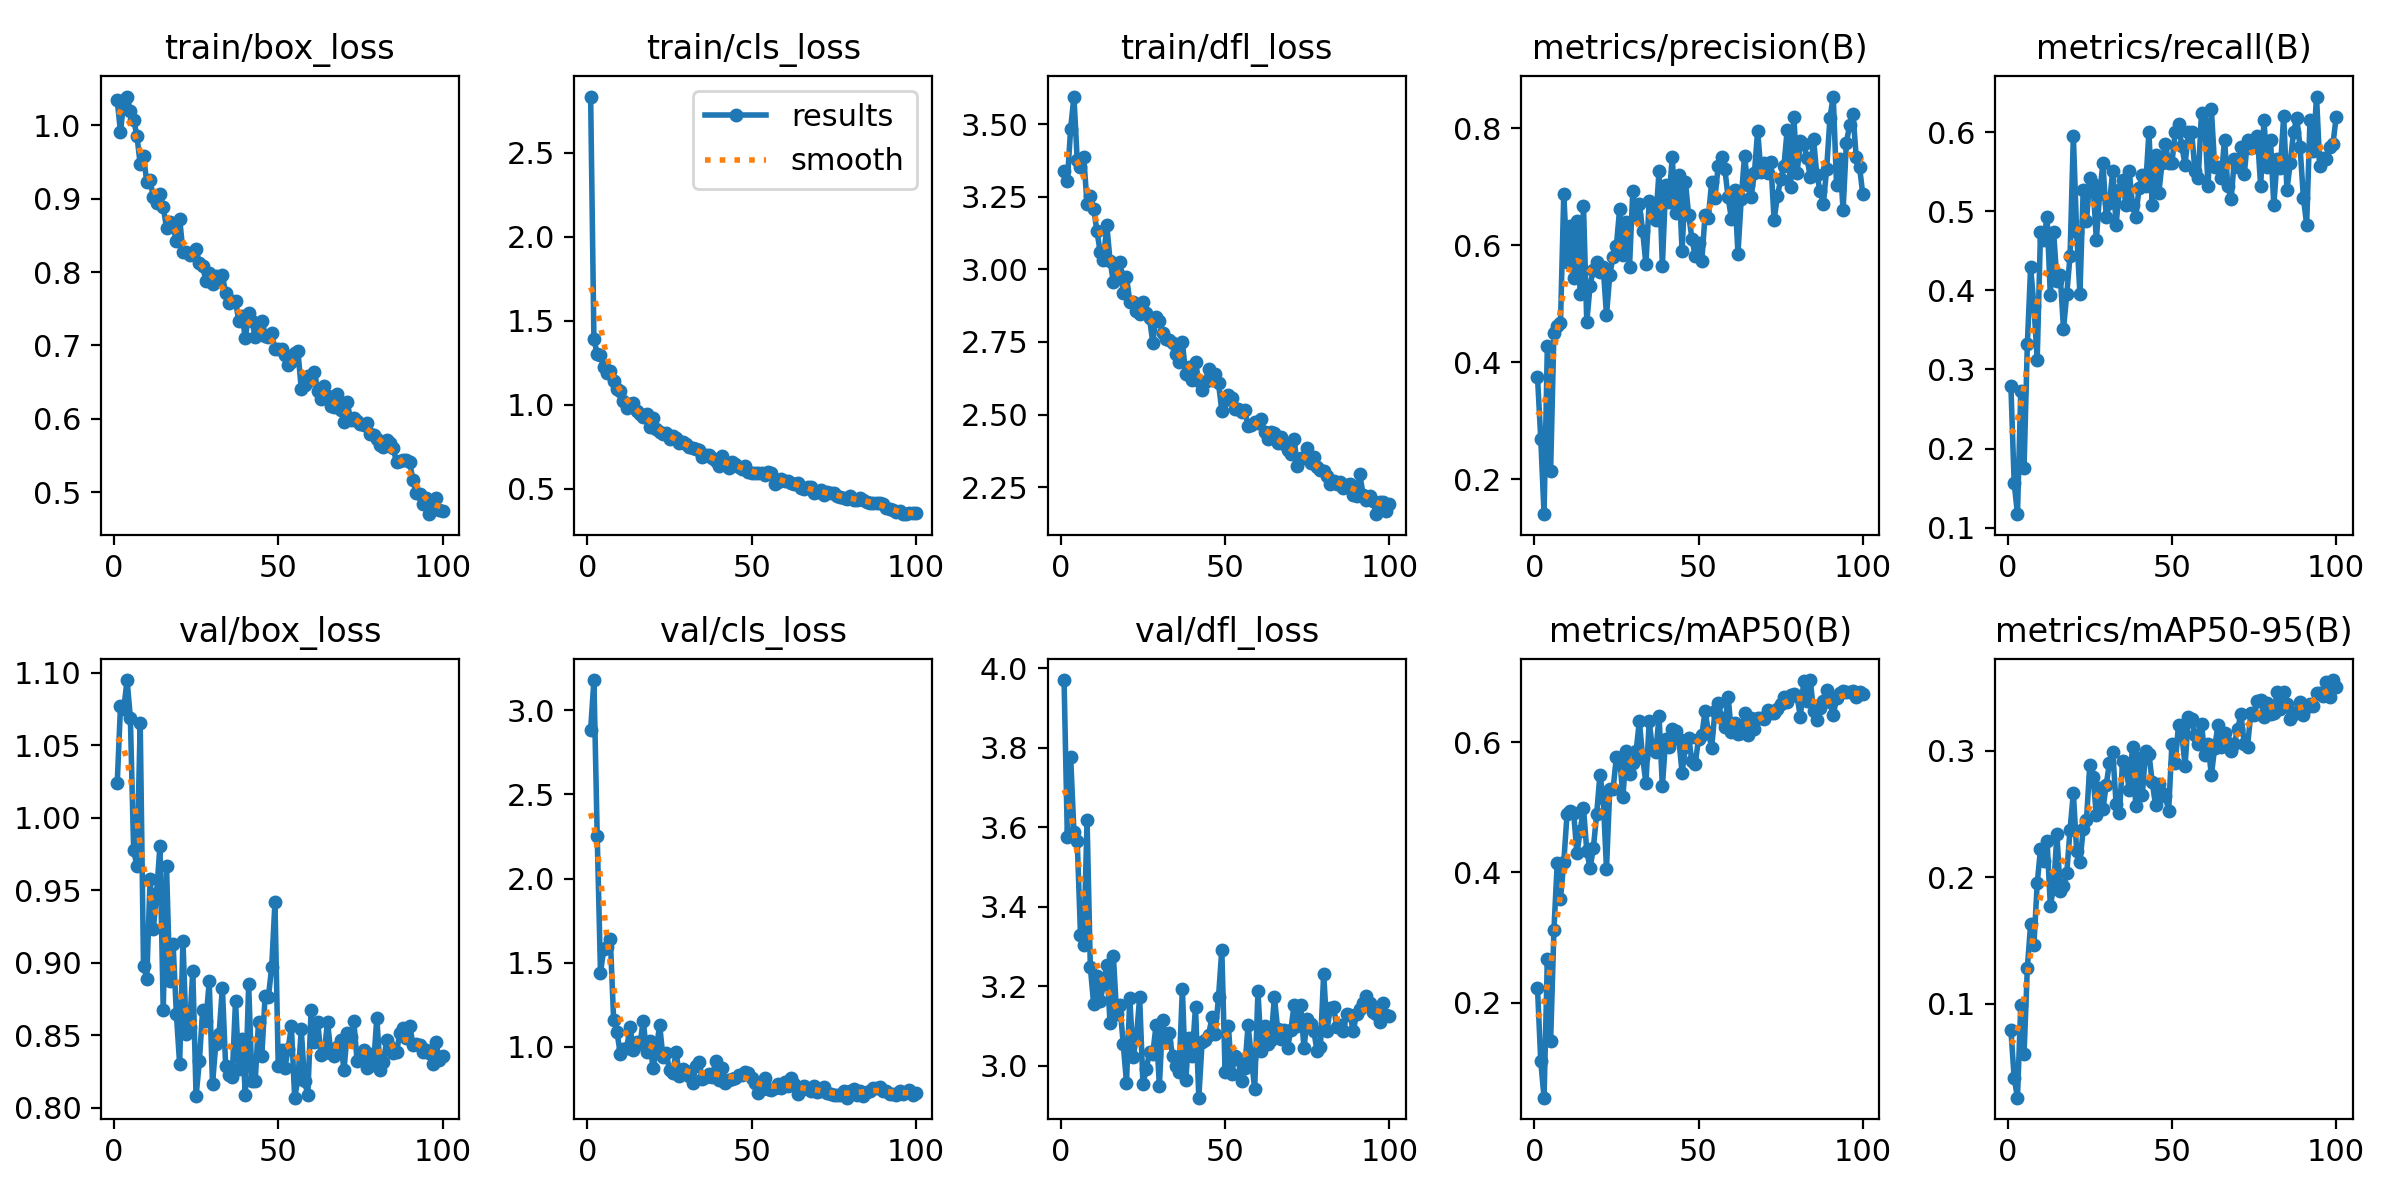

In [6]:
%cd /content
Image(filename=f'/content/runs/detect/train/results.png', width=600)

/content


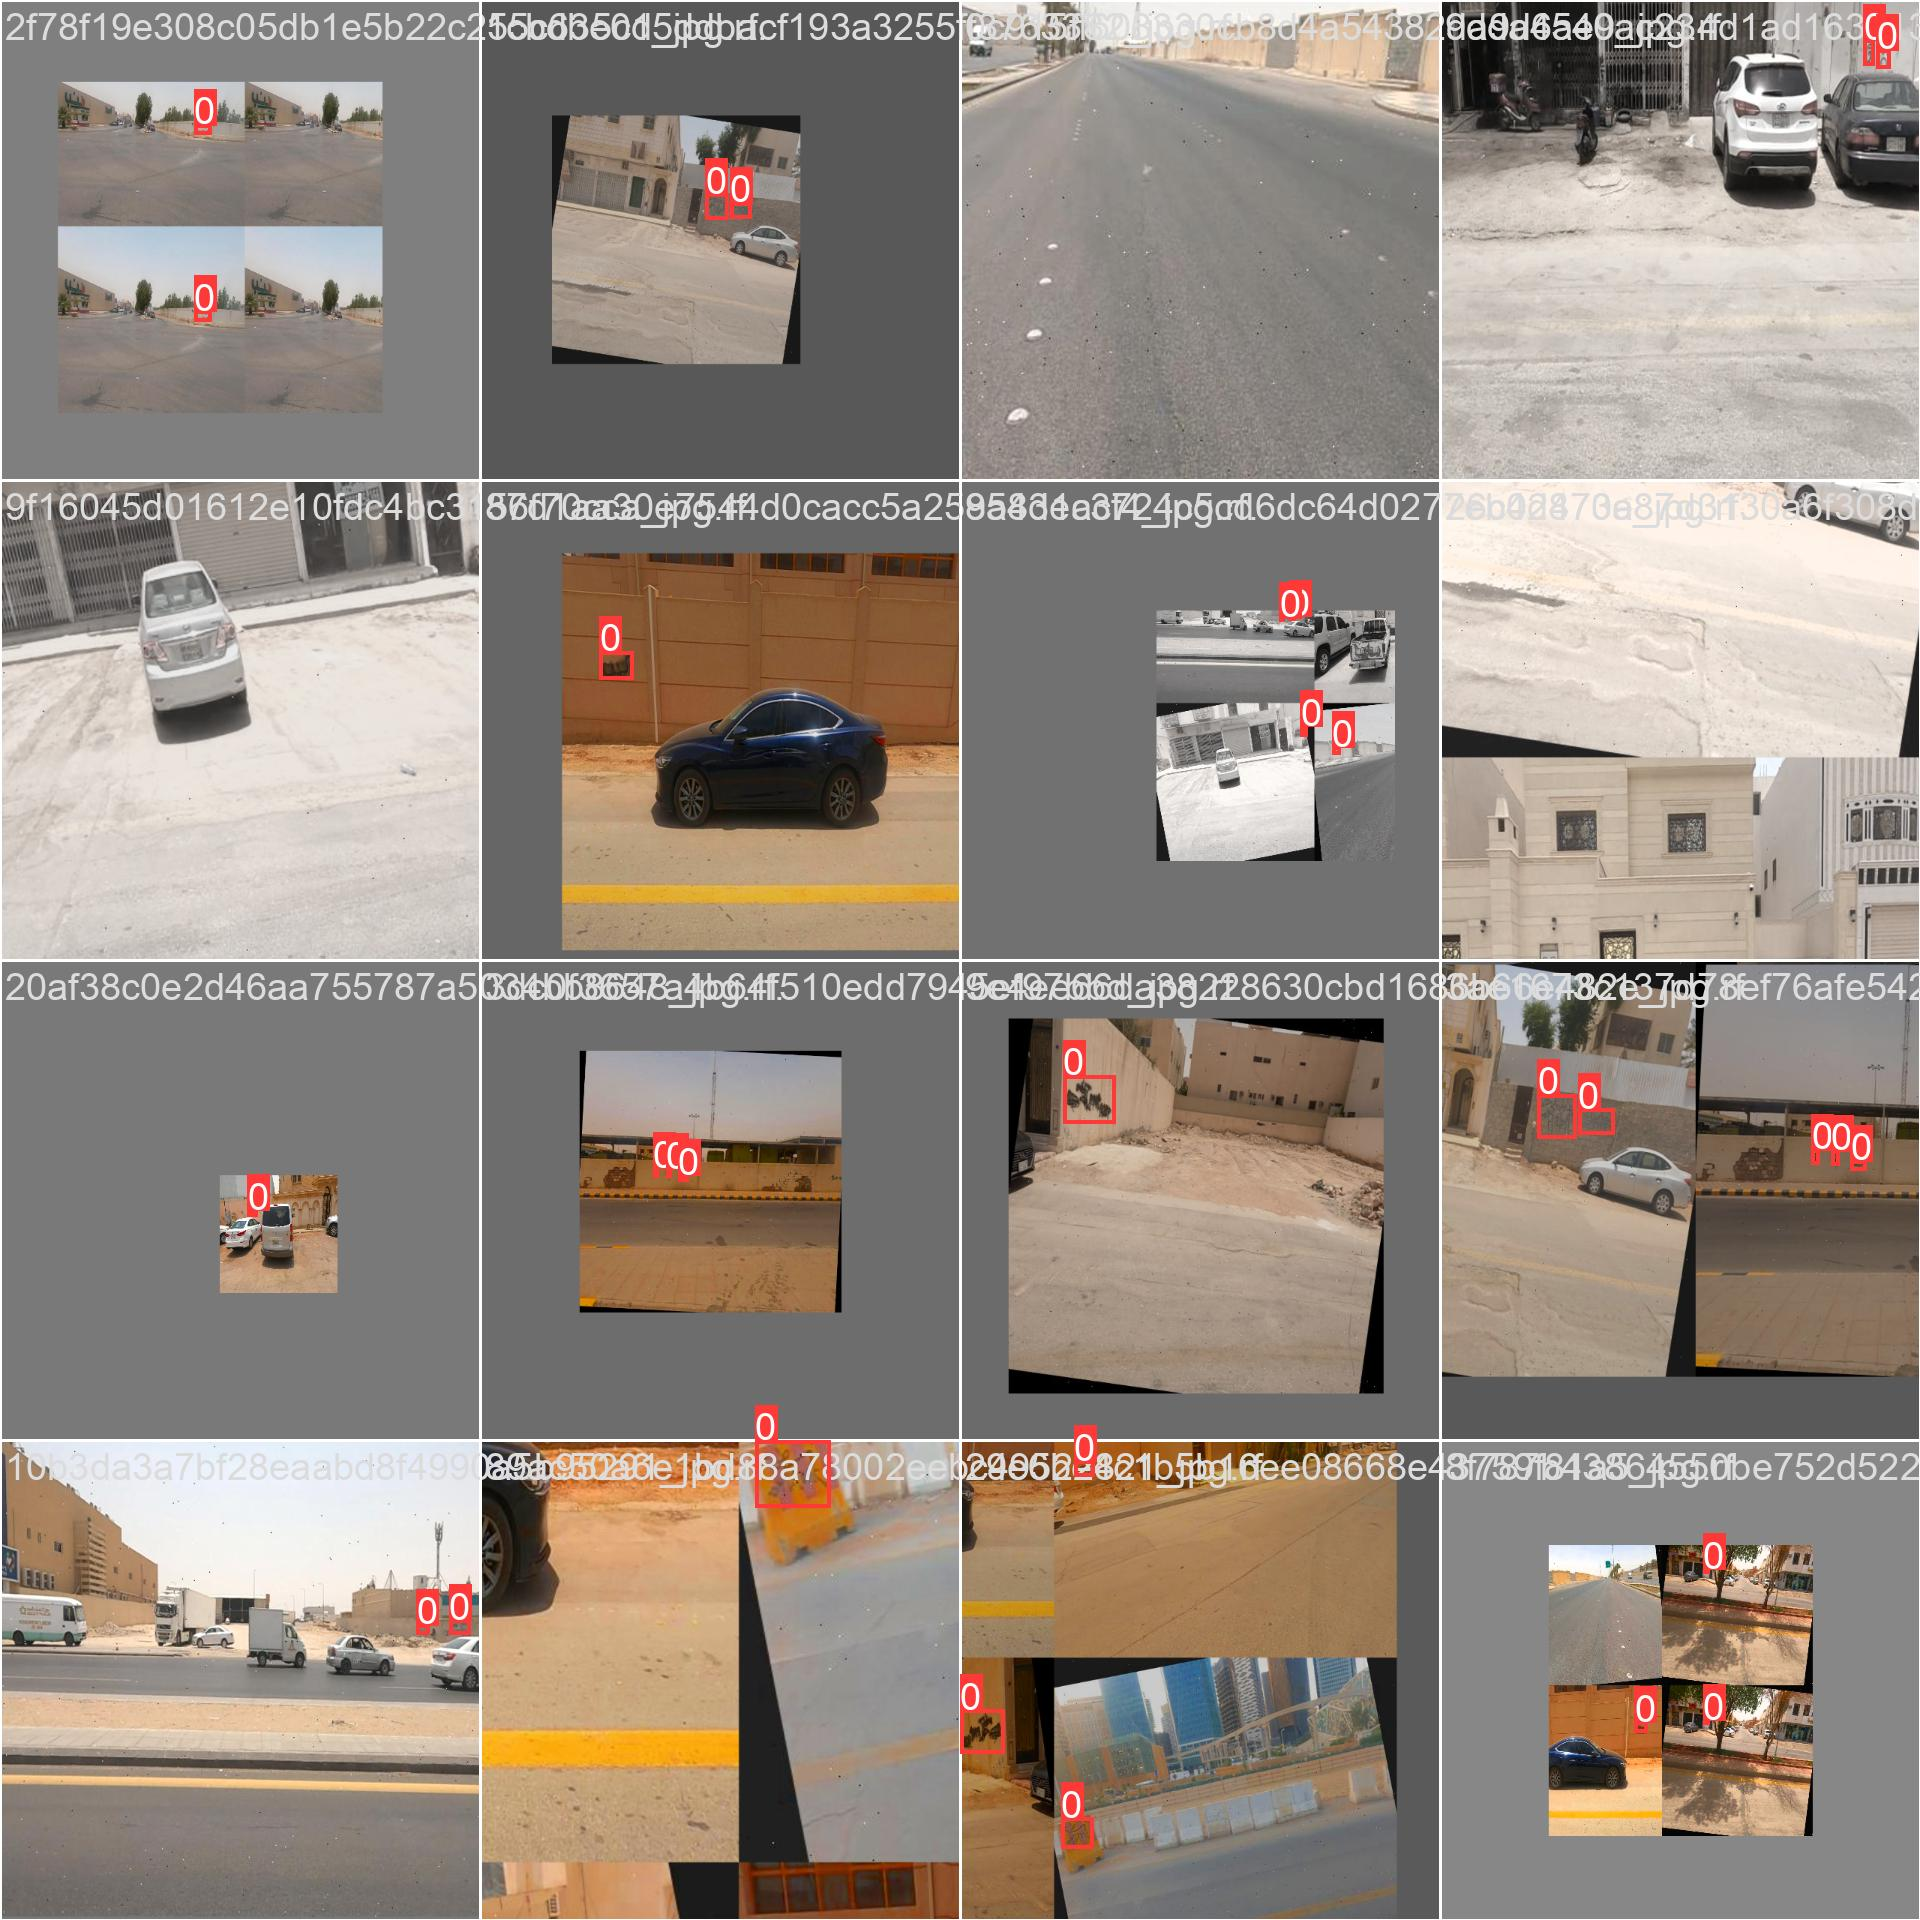

In [8]:
%cd /content
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width=600)

In [9]:
%cd /content

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/Graffiti-detection-2/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Graffiti-detection-2/valid/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100% 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:04<00:00,  1.23it/s]
                   all         88        205      0.736      0.585      0.678      0.357
Speed: 4.1ms preprocess, 11.8ms inference, 0.0ms loss, 10.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Graffiti-detection-2/test/images save=True save_txt=True save_conf=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/44 /content/datasets/Graffiti-detection-2/test/images/030a78514521188500fa24de227b33f0_jpg.rf.c7f9e5b6218db254d37810a1041a3ef4.jpg: 640x640 1 Graffiti, 16.4ms
image 2/44 /content/datasets/Graffiti-detection-2/test/images/03ea809773b3e96af83efff9b6182d98_jpg.rf.daa6a3e95ae3a88d2b1bd596345e5fe4.jpg: 640x640 2 Graffitis, 16.5ms
image 3/44 /content/datasets/Graffiti-detection-2/test/images/08e8b68c7aae150314d5749e24f0711e_jpg.rf.cac52329fb0ab74902c63a32a1ccc842.jpg: 640x640 3 Graffitis, 16.4ms
image 4/44 /content/datasets/Graffiti-detection-2/test/images/0ea2c48fd914b91ce0c1b9b07c76590e_jpg.rf.a25621264541dd699f2280a338f8fe39.jpg: 640x640 3 Graffitis, 16.3ms
image 5/44 /content/datasets/Graffiti-detection-2/test/images/119f4f9696e95381354bad27e9dc0bc8_jpg.rf.59dbcf13a633c5a96b85283008de8cab.jpg: 640x640 2 Graffitis

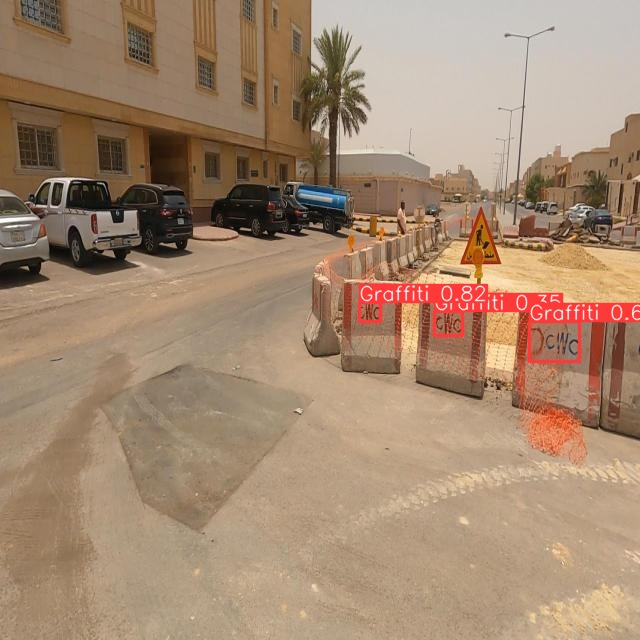

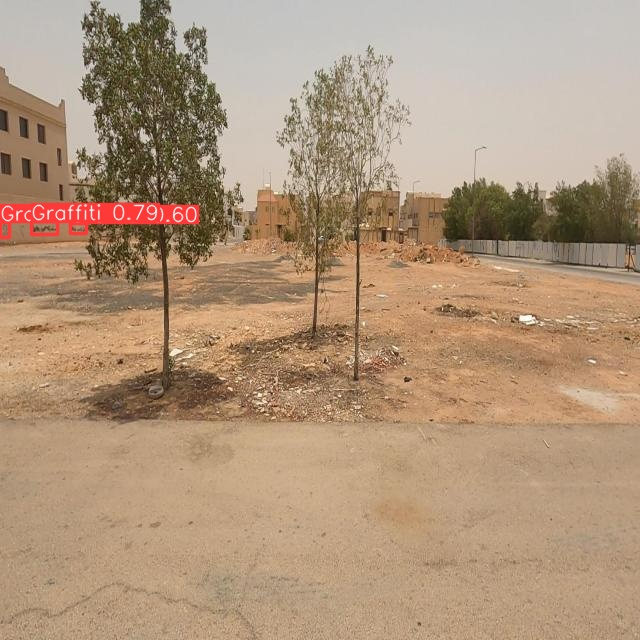

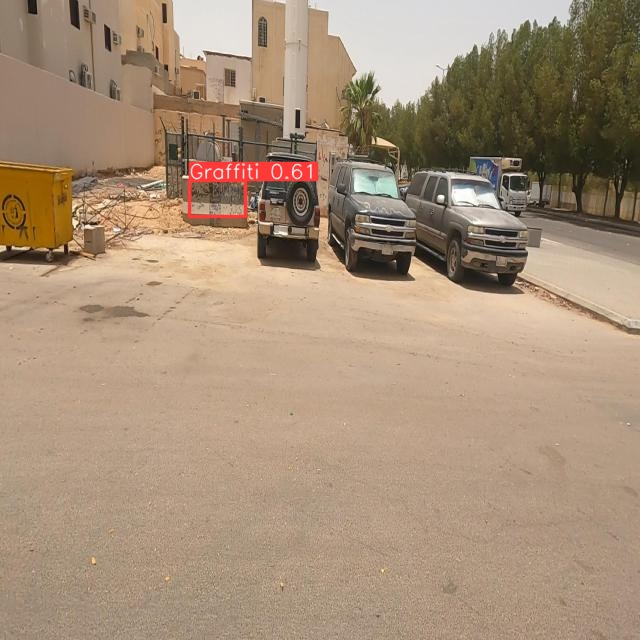

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [12]:
import os

def extract_ground_truth_boxes(dataset_path):
    gt_boxes = {}
    labels_path = os.path.join(dataset_path, 'labels')

    for label_file in os.listdir(labels_path):
        with open(os.path.join(labels_path, label_file), 'r') as file:
            boxes = file.readlines()
            image_id = label_file.replace('.txt', '')
            gt_boxes[image_id] = [list(map(float, box.split(' ')[1:])) for box in boxes]  # Skipping class ID

    return gt_boxes

In [15]:
dataset_path = os.path.join(HOME, 'datasets', 'Graffiti-detection-2', 'test')

In [16]:
ground_truth_boxes = extract_ground_truth_boxes(dataset_path)

In [17]:
def extract_predicted_boxes(predictions_path):
    predicted_boxes = {}
    for pred_file in os.listdir(predictions_path):
        # Skip non-txt files
        if not pred_file.endswith('.txt'):
            continue

        with open(os.path.join(predictions_path, pred_file), 'r') as file:
            boxes = file.readlines()
            image_id = pred_file.replace('.txt', '')
            # Parse each line in the prediction file
            predicted_boxes[image_id] = [list(map(float, box.split(' ')[:5])) for box in boxes]  # [:5] to include class, bbox coords, and exclude confidence if present

    return predicted_boxes

In [18]:
predictions_path = '/content/runs/detect/predict/labels'
predicted_boxes = extract_predicted_boxes(predictions_path)

In [23]:
def calculate_iou(boxA, boxB):
    # Coordinates of intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Intersection area
    intersection_area = max(0, xB - xA) * max(0, yB - yA)

    # Areas of both rectangles
    boxA_area = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxB_area = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # Union area
    union_area = boxA_area + boxB_area - intersection_area

    # IoU
    iou = intersection_area / union_area
    return iou

# Calculate IoUs for each image
iou_results = {}
for image_id, gt_boxes in ground_truth_boxes.items():
    predicted_boxes_for_image = predicted_boxes.get(image_id, [])
    ious_for_image = []
    for pred_box in predicted_boxes_for_image:
        # Convert pred_box to the format (x1, y1, x2, y2)
        pred_box_converted = [pred_box[1] - pred_box[3]/2, pred_box[2] - pred_box[4]/2,
                              pred_box[1] + pred_box[3]/2, pred_box[2] + pred_box[4]/2]
        for gt_box in gt_boxes:
            # Convert gt_box to the format (x1, y1, x2, y2)
            gt_box_converted = [gt_box[0] - gt_box[2]/2, gt_box[1] - gt_box[3]/2,
                                gt_box[0] + gt_box[2]/2, gt_box[1] + gt_box[3]/2]
            iou = calculate_iou(pred_box_converted, gt_box_converted)
            ious_for_image.append(iou)
    iou_results[image_id] = ious_for_image

# `iou_results` now contains the IoU for each predicted box with every ground truth box, for each image


In [25]:
# Assuming `iou_results` is a dictionary where each key is an image ID
# and each value is a list of IoU values for that image
all_ious = []

for image_id, ious in iou_results.items():
    # Filter out IoU values below a certain threshold if needed
    # For example, to consider only IoU > 0.5:
     filtered_ious = [iou for iou in ious if iou > 0.5]
     all_ious.extend(filtered_ious)

    # If you're not filtering by threshold, just extend the list
    #all_ious.extend(ious)

# Calculate mean IoU
if all_ious:  # Check to prevent division by zero
    mean_iou = sum(all_ious) / len(all_ious)
    print(f"Mean IoU: {mean_iou}")
else:
    print("No IoU values to calculate mean IoU.")

Mean IoU: 0.7598707213323894


In [26]:
!pip install pycocotools

In [27]:
import json

# Your ground truth data
ground_truth_data = ground_truth_boxes

# Initialize the COCO dataset structure
coco_format = {
    "images": [],
    "annotations": [],
    "categories": [{"id": 1, "name": "Graffiti"}]  # Single category
}

# Convert ground truth data to COCO format
annotation_id = 1
for image_id, (image_name, boxes) in enumerate(ground_truth_data.items(), start=1):
    # Add image information
    coco_format["images"].append({
        "id": image_id,
        "file_name": image_name,
        "width": 640,  # Assuming a constant width, adjust as necessary
        "height": 640  # Assuming a constant height, adjust as necessary
    })

    # Add annotations (bounding boxes)
    for box in boxes:
        # Convert from [center_x, center_y, width, height] to [top left x, top left y, width, height]
        coco_bbox = [(box[0] - box[2] / 2) * 640,  # Multiply by image width to get pixel values
                     (box[1] - box[3] / 2) * 640,  # Multiply by image height to get pixel values
                     box[2] * 640,  # Multiply by image width to get pixel values
                     box[3] * 640]  # Multiply by image height to get pixel values

        coco_format["annotations"].append({
            "id": annotation_id,
            "image_id": image_id,
            "category_id": 1,  # "Graffiti" category
            "bbox": coco_bbox,
            "area": coco_bbox[2] * coco_bbox[3],  # width * height
            "iscrowd": 0  # Assuming single object per box
        })
        annotation_id += 1

# Write the COCO-formatted ground truth data to a JSON file
with open('ground_truth_coco_format.json', 'w') as f:
    json.dump(coco_format, f, indent=4)

In [28]:
def extract_predicted_boxes_with_conf(predictions_path):
    predicted_boxes = {}
    for pred_file in os.listdir(predictions_path):
        # Skip non-txt files
        if not pred_file.endswith('.txt'):
            continue

        with open(os.path.join(predictions_path, pred_file), 'r') as file:
            boxes = file.readlines()
            image_id = pred_file.replace('.txt', '')
            # Parse each line in the prediction file
            predicted_boxes[image_id] = [list(map(float, box.split(' ')[:6])) for box in boxes]  # [:5] to include class, bbox coords, and exclude confidence if present

    return predicted_boxes

In [29]:
predictions_path = '/content/runs/detect/predict/labels'
predicted_boxes_with_conf = extract_predicted_boxes_with_conf(predictions_path)

In [30]:
image_id_mapping = {}

for image_id, (image_name, _) in enumerate(ground_truth_data.items(), start=1):
    image_id_mapping[image_name] = image_id

In [31]:
# Your predicted boxes data
predicted_boxes = predicted_boxes_with_conf

# Initialize the predictions list
predictions = []

# Populate the predictions using the mapping
for image_name, boxes in predicted_boxes.items():
    image_id = image_id_mapping.get(image_name)  # Get the corresponding image_id
    if not image_id:
        continue  # Skip if image_id not found in mapping

    for box in boxes:
        # Ensure the box has at least 5 elements (class_id, center_x, center_y, width, height)
        if len(box) < 5:
            continue  # Skip this box if it doesn't have enough information

        # Convert from center-based to top-left-based format and scale to pixel dimensions
        coco_bbox = [(box[1] - box[3] / 2) * 640,
                     (box[2] - box[4] / 2) * 640,
                     box[3] * 640,
                     box[4] * 640]

        # Use the score if available, otherwise default to 1.0
        score = box[5] if len(box) > 5 else 1.0

        predictions.append({
            "image_id": image_id,
            "category_id": 1,  # Assuming all predictions are for the "Graffiti" category
            "bbox": coco_bbox,
            "score": score
        })

# Write predictions to a JSON file
with open('predicted_boxes_coco_format.json', 'w') as f:
    json.dump(predictions, f, indent=4)

In [32]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Load ground truth annotations
coco_gt = COCO("/content/ground_truth_coco_format.json")

# Load detection results
coco_dt = coco_gt.loadRes("/content/predicted_boxes_coco_format.json")

# Initialize COCOeval object
coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')

# Evaluate on a subset of images or all images
# coco_eval.params.imgIds = [list of image ids]  # Use if evaluating on a subset
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.304
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.537
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.292
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.285
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.338
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.330
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.384
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

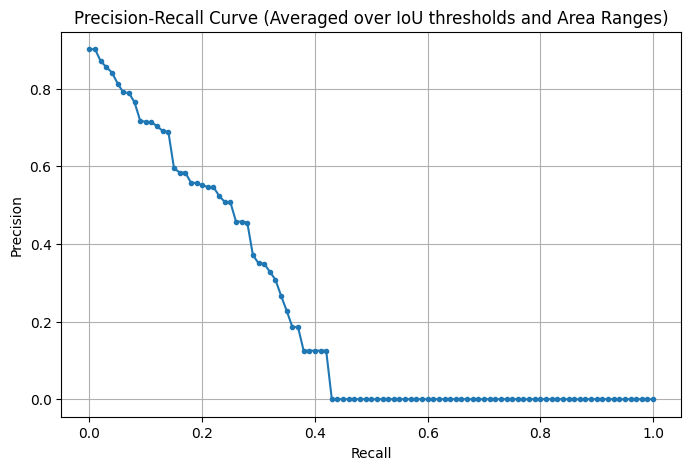

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Extract precision for all IoU thresholds, for the single category, all area ranges, and the first max detection count
precision = coco_eval.eval['precision'][:, :, 0, :, 0]  # Shape will be [T, R, A]
recall = np.linspace(0, 1, precision.shape[1])  # Recall levels

# Average precision over all IoU thresholds and area ranges
mean_precision = np.mean(precision, axis=(0, 2))  # Averaging over T and A

# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, mean_precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Averaged over IoU thresholds and Area Ranges)')
plt.grid(True)
plt.show()

In [34]:
import numpy as np
# After running coco_eval.evaluate() and coco_eval.accumulate()

# Choose an IoU threshold index. For example:
# 0 for IoU=0.50, 1 for IoU=0.55, ..., 9 for IoU=0.95
iou_threshold_index = 1  # Index for IoU=0.55

# Extract precision for all recall levels at the specific IoU threshold
# and for a specific category (assuming only 1 category)
# The last dimension (-1) is for the maximum number of detections (e.g., 100)
precision_at_iou = coco_eval.eval['precision'][iou_threshold_index, :, 0, 0, -1]

# Recall levels are fixed from 0 to 1 for the COCO evaluation
recall_levels = np.linspace(0, 1, num=precision_at_iou.shape[0])



# Initialize F1 scores array
f1_scores = np.zeros(precision_at_iou.shape[0])

# Calculate F1 score for each recall level
for i in range(precision_at_iou.shape[0]):
    p = precision_at_iou[i]  # Precision at this recall level
    r = recall_levels[i]  # Recall at this level

    # Calculate F1 score, avoid division by zero
    if p + r > 0:
        f1_scores[i] = 2 * (p * r) / (p + r)
    else:
        f1_scores[i] = 0  # If both precision and recall are zero, F1 is zero

# Find the maximum F1 score across all recall levels
max_f1_index = np.argmax(f1_scores)
best_f1_score = f1_scores[max_f1_index]
best_recall = recall_levels[max_f1_index]
best_precision = precision_at_iou[max_f1_index]

print(f"Best F1 Score: {best_f1_score} at Recall: {best_recall} and Precision: {best_precision}")

Best F1 Score: 0.6253897550111359 at Recall: 0.54 and Precision: 0.7428571428571429


In [35]:
# Select the IoU index for which you want to calculate the F1 score
# IoU thresholds are typically [0.5:0.05:0.95], so index 0 corresponds to IoU=0.50
iou_threshold_index = 2  # Example for IoU=0.50

# Extract precision for the specified IoU threshold index, all recall levels, the first category, and area range 'all'
precision_at_iou = coco_eval.eval['precision'][iou_threshold_index, :, 0, 0, -1]  # last index -1 means 'maxDets' is typically 100
recall_levels = np.linspace(0, 1, len(precision_at_iou))

# Now you can proceed with the F1 score calculation using the extracted precision_at_iou
# Initialize F1 scores array
f1_scores = np.zeros(len(recall_levels))

# Calculate F1 score for each recall level
for i in range(len(recall_levels)):
    p = precision_at_iou[i]  # Precision at this recall level
    r = recall_levels[i]  # Recall at this level

    # Calculate F1 score, avoid division by zero
    if p + r > 0:
        f1_scores[i] = 2 * (p * r) / (p + r)
    else:
        f1_scores[i] = 0  # If both precision and recall are zero, F1 is zero

# Find the maximum F1 score across all recall levels
max_f1_index = np.argmax(f1_scores)
best_f1_score = f1_scores[max_f1_index]
best_recall = recall_levels[max_f1_index]
best_precision = precision_at_iou[max_f1_index]

print(f"Best F1 Score: {best_f1_score} at Recall: {best_recall} and Precision: {best_precision}")


Best F1 Score: 0.6253897550111359 at Recall: 0.54 and Precision: 0.7428571428571429


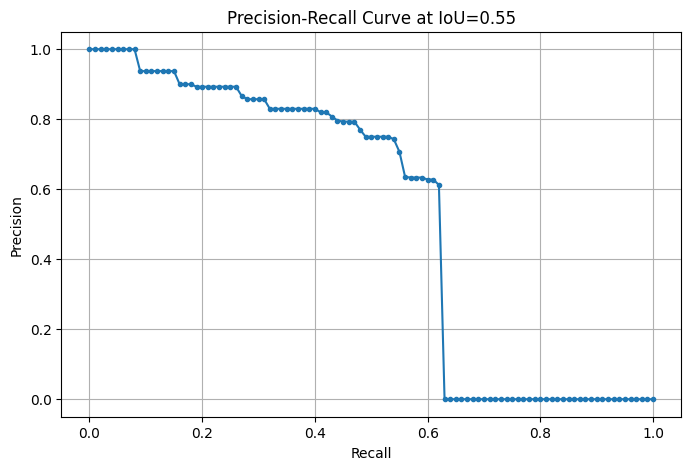

In [36]:
import matplotlib.pyplot as plt

# Assuming you have already run coco_eval.evaluate() and coco_eval.accumulate()

# Extract precision and recall for a specific IoU threshold and category
iou_threshold_index = 1  # Index for IoU=0.55
precision = coco_eval.eval['precision'][iou_threshold_index, :, 0, 0, -1]  # [IoU, recall, cat, area, maxDets]
recall = np.linspace(0, 1, num=precision.shape[0])  # Assuming 101 recall levels

# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.title(f'Precision-Recall Curve at IoU={0.5 + iou_threshold_index*0.05:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()